In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [20]:
df = pd.read_csv("diabetes.csv")

In [21]:
print(df.head)

<bound method NDFrame.head of       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2      138             62             35        0  33.6   
1               0       84             82             31      125  38.2   
2               0      145              0              0        0  44.2   
3               0      135             68             42      250  42.3   
4               1      139             62             41      480  40.7   
...           ...      ...            ...            ...      ...   ...   
1995            2       75             64             24       55  29.7   
1996            8      179             72             42      130  32.7   
1997            6       85             78              0        0  31.2   
1998            0      129            110             46      130  67.1   
1999            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                     

In [26]:
clm0val= ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in clm0val:
    df[col] = df[col].replace(0, df[col].median())

print("Summary statistics after handling zero values:")
display(df.describe())

Summary statistics after handling zero values:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.943000,72.385500,27.52450,99.374000,32.645200,0.470930,33.090500,0.342000
std,3.306063,30.535733,11.949824,9.56374,98.438245,7.190254,0.323553,11.786423,0.474498
min,0.000000,44.000000,24.000000,7.00000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.00000,40.000000,27.600000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.00000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.00000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.00000,744.000000,80.600000,2.420000,81.000000,1.000000


In [27]:
print(df.head)

<bound method NDFrame.head of       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2      138             62             35       40  33.6   
1               0       84             82             31      125  38.2   
2               0      145             72             23       40  44.2   
3               0      135             68             42      250  42.3   
4               1      139             62             41      480  40.7   
...           ...      ...            ...            ...      ...   ...   
1995            2       75             64             24       55  29.7   
1996            8      179             72             42      130  32.7   
1997            6       85             78             23       40  31.2   
1998            0      129            110             46      130  67.1   
1999            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                     

In [14]:

X = df.drop(columns=["Outcome"])
y = df["Outcome"]

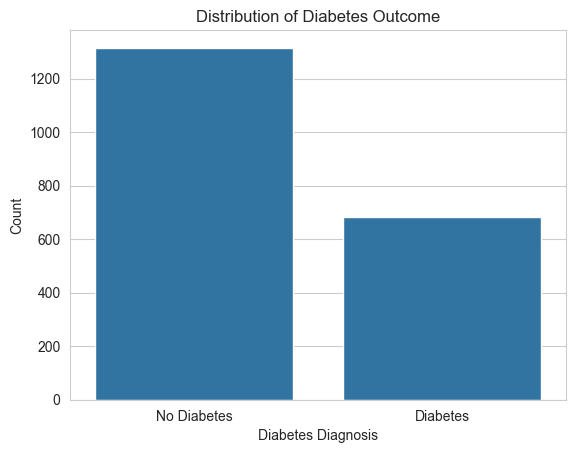

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='Outcome',data=df)
plt.xticks(ticks=[0, 1], labels=["No Diabetes", "Diabetes"])
plt.title("Distribution of Diabetes Outcome")
plt.xlabel("Diabetes Diagnosis")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

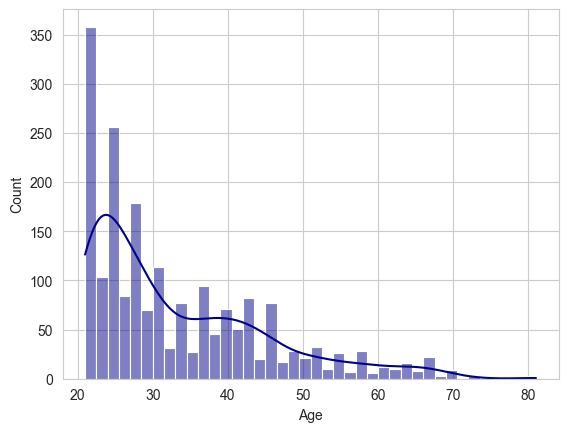

In [29]:
sns.histplot(df['Age'].dropna(),kde=True,color='darkblue',bins=40)

In [15]:

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Logistic Regression

Logistic Regression Performance:
Accuracy: 0.795
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       389
           1       0.77      0.60      0.67       211

    accuracy                           0.80       600
   macro avg       0.79      0.75      0.76       600
weighted avg       0.79      0.80      0.79       600



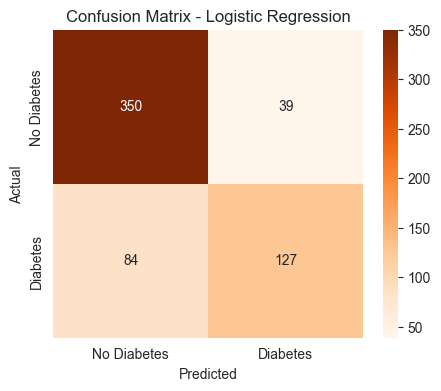

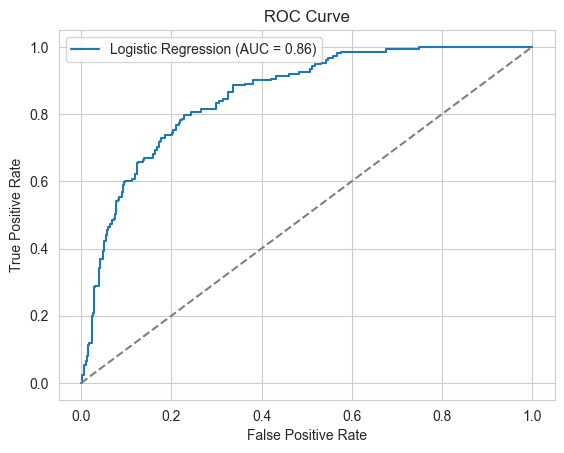

Random Forest

Random Forest Performance:
Accuracy: 0.9716666666666667
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       389
           1       0.96      0.96      0.96       211

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



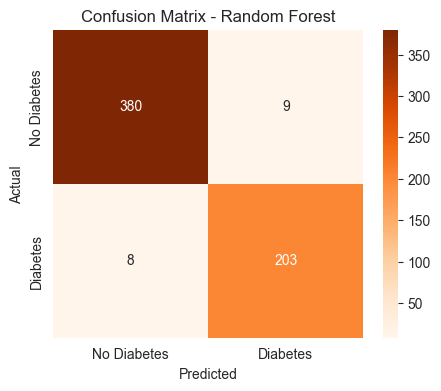

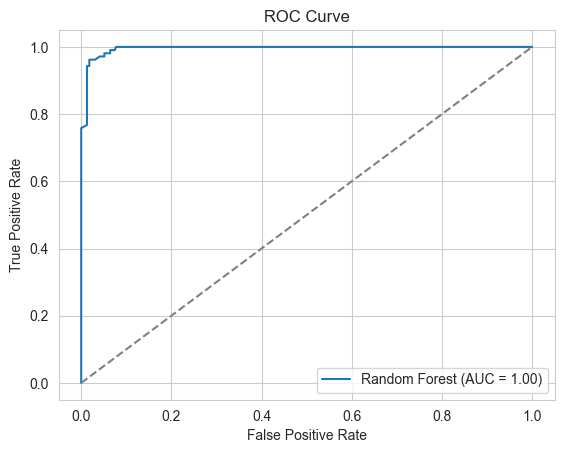

In [32]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    print(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Step 7: Model Evaluation
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # Step 8: Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # Step 9: ROC Curve
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr, tpr):.2f})")  # Added closing parenthesis
    plt.plot([0, 1], [0, 1], linestyle="--", color='grey')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()